In [2]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
 
 
uploaded = files.upload()

Saving ERCOT 2019.csv to ERCOT 2019.csv


In [3]:
import pandas as pd
import io
import datetime
 
data = pd.read_csv(io.BytesIO(uploaded['ERCOT 2019.csv']))

In [47]:
uploaded = files.upload()


Saving 2010.csv to 2010.csv
Saving 2011.csv to 2011.csv
Saving 2012.csv to 2012.csv
Saving 2013.csv to 2013.csv
Saving 2014.csv to 2014.csv
Saving 2015.csv to 2015.csv
Saving 2016.csv to 2016.csv
Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv


In [87]:
uploaded = files.upload()


Saving CAISO 2030.csv to CAISO 2030.csv


In [89]:
dc = pd.read_csv(io.BytesIO(uploaded['CAISO 2030.csv']))


In [48]:
de10 = pd.read_csv(io.BytesIO(uploaded['2010.csv']))
de11 = pd.read_csv(io.BytesIO(uploaded['2011.csv']))
de12 = pd.read_csv(io.BytesIO(uploaded['2012.csv']))
de13 = pd.read_csv(io.BytesIO(uploaded['2013.csv']))
de14 = pd.read_csv(io.BytesIO(uploaded['2014.csv']))
de15 = pd.read_csv(io.BytesIO(uploaded['2015.csv']))
de16 = pd.read_csv(io.BytesIO(uploaded['2016.csv']))
de17 = pd.read_csv(io.BytesIO(uploaded['2017.csv']))
de18 = pd.read_csv(io.BytesIO(uploaded['2018.csv']))
de19 = pd.read_csv(io.BytesIO(uploaded['2019.csv']))

In [69]:
de = []

In [ ]:
# Group the rows by node ID
grouped = de19.groupby('pnode_id')

grouped.get_group(1)
# Iterate over each group
for pnode_id, group_df in grouped:
    # Do something with the group
    # group_df contains all the rows associated with the current node_id
    #print(pnode_id)

    de.append(group_df)

print(de)
print(len(de[0]))

In [42]:
dr = pd.read_csv(io.BytesIO(uploaded['ERCOT 2030.csv']))

In [ ]:
dt = pd.read_csv(io.BytesIO(uploaded['da_hrl_lmps.csv']))
print(dt)

In [42]:
print(dt['total_lmp_da'])

0         35.402800
1         38.336592
2         34.040000
3         34.040000
4         35.190000
            ...    
950611    21.200000
950612    19.380000
950613    21.460000
950614    20.690000
950615    20.650000
Name: total_lmp_da, Length: 950616, dtype: float64


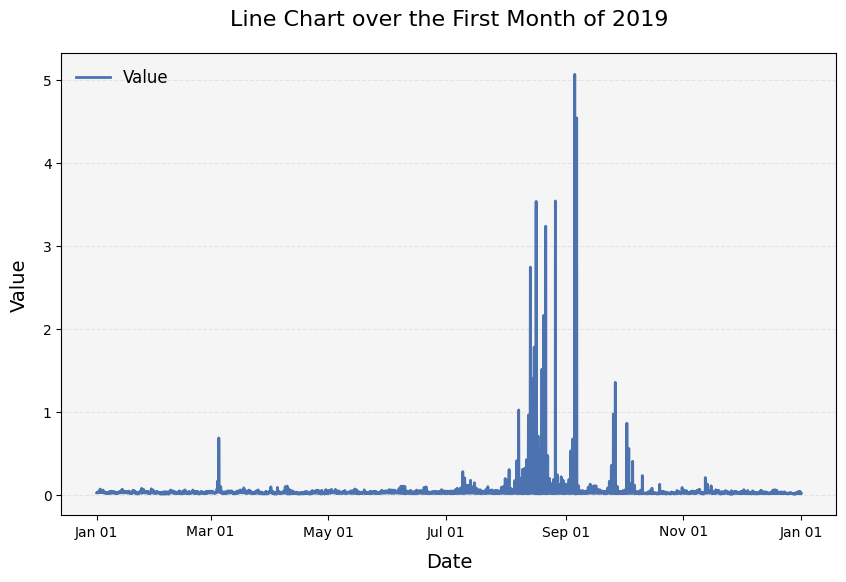

In [4]:
import matplotlib.dates as mpl_dates

# Create a pandas dataframe
df = pd.DataFrame({'Value': data['Inflated to 2020 prices']})

# Convert hours to datetime objects
df['Datetime'] = pd.to_datetime(data['Hour Index'], unit='h', origin=datetime.datetime(2019, 1, 1))

# Set the 'Datetime' column as the index
df.set_index('Datetime', inplace=True)

# Slice the dataframe to only include data from January
# df = df.loc['2019-01-01':'2019-01-31']

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a line chart
ax.plot(df.index, df['Value'], color='#4C72B0', linewidth=2, label='Value')

# Set x-axis tick labels to show only month and day
date_format = mpl_dates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=10)

# Add a grid and customize its appearance
ax.grid(True, linestyle='--', color='lightgray', alpha=0.5, axis='y')

# Add a legend and customize its appearance
ax.legend(frameon=False, fontsize=12, loc='upper left')

# Add labels and title
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Value', fontsize=14, labelpad=10)
plt.title('Line Chart over the First Month of 2019', fontsize=16, pad=20)

# Set the background color of the plot area
ax.set_facecolor('#F5F5F5')

# Show the plot
plt.show()





In [ ]:
plt.plot(df.index, df['Value'])


In [6]:
print(data['Inflated to 2020 prices'])

0       0.020743
1       0.020014
2       0.019801
3       0.019447
4       0.021482
          ...   
8755    0.018981
8756    0.017625
8757    0.016025
8758    0.015428
8759    0.014638
Name: Inflated to 2020 prices, Length: 8760, dtype: float64


In [7]:
# Define constants
capex = 900  # Initial capex in $/kW
system_size = 10000 # System size in kW
years = 10  # Number of years
hours_per_year = 8766  # Number of hours per year
rated_current_density = 1.7  # Rated current density in A/cm^2
rated_voltage = 1.75  # Operating voltage at rated current density
electrode_area = 1e7 / (rated_current_density * rated_voltage)  # Electrode area in cm^2
molecular_weight_h2 = 2.016  # Molecular weight of H2 in g/mol
cell_voltage_degradation_rate = 0.0015 / 1000  # Cell voltage degradation rate per 1000 hours
faraday_constant = 96485  # Faraday's constant in C/mol
om = 0.05  # O&M cost factor

#add some constants for the non-linear fit so that they can be increased with the voltage degradation
observed_voltages = [1.44926681, 1.46814217, 1.4868864, 1.50550044, 1.52398517, 1.54234149, 1.56057031, 1.5786725, 1.59664894, 1.61450051, 1.63222807, 1.64983249, 1.66731462, 1.68467532, 1.70191541, 1.71903575, 1.73603716, 1.75292048, 1.76968651, 1.78633608, 1.80286999, 1.81928905, 1.83559406, 1.8517858, 1.86786507, 1.88383264, 1.8996893, 1.9154358, 1.93107293, 1.94660143, 1.97733558, 1.99254272, 2.00764422, 2.02264082, 2.03753325, 2.05232223, 2.06700847, 2.0815927, 2.09607562, 2.11045794, 2.12474035, 2.13892354, 2.15300821, 2.16699505, 2.18088472, 2.19467791, 2.20837529, 2.22197752, 2.23548526, 2.24889917, 2.2622199, 2.27544809, 2.2885844, 2.30162946, 2.3145839, 2.32744835, 2.34022344, 2.35290979, 2.36550801, 2.37801872] # From Ginsberg et al. 2022 https://github.com/mv2731/PEM-TEA-public/blob/main/PEM-TEA/Code/Modes%201-3_H2%20TEA_31Mar2022.ipynb

#Update Formula with correct non-linear fit

In [8]:
Fit_1 = 1.44926681 #C
Fit_2 = 2.71725674 #A
Fit_3 = 0.06970714 #K

# Add in the voltage degradation and then each time for 1.7A append the corresponding voltage (Fit_1 parameter better) value to the list to then plot how it goes up over hours (then can make the same plot that they did)
model_voltages = (Fit_1 + Fit_2 * (1 - np.exp(-Fit_3 * np.arange(0.1, 6.1, 0.1)))) # Get voltages from the exponential fit for 0.1 to 6.0 A in increments of 0.1A
print(model_voltages)

[1.46814217 1.4868864  1.50550044 1.52398517 1.54234149 1.56057031
 1.5786725  1.59664894 1.61450051 1.63222807 1.64983249 1.66731462
 1.68467532 1.70191541 1.71903575 1.73603716 1.75292048 1.76968651
 1.78633608 1.80286999 1.81928905 1.83559406 1.8517858  1.86786507
 1.88383264 1.8996893  1.9154358  1.93107293 1.94660143 1.96202206
 1.97733558 1.99254272 2.00764422 2.02264082 2.03753325 2.05232223
 2.06700847 2.0815927  2.09607562 2.11045794 2.12474035 2.13892354
 2.15300821 2.16699505 2.18088472 2.19467791 2.20837529 2.22197752
 2.23548526 2.24889917 2.2622199  2.27544809 2.2885844  2.30162946
 2.3145839  2.32744835 2.34022344 2.35290979 2.36550801 2.37801872]


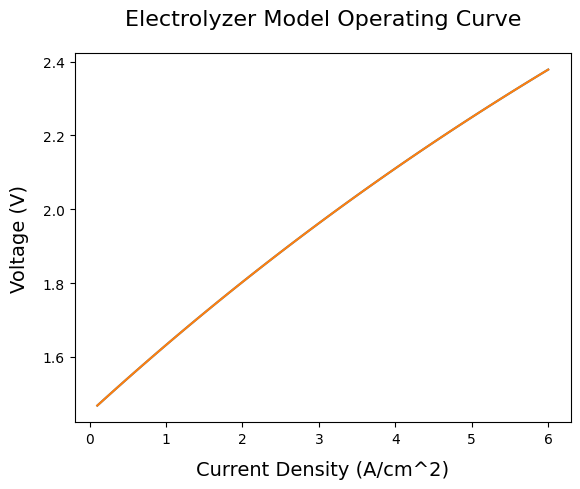

In [39]:
# Add labels and title
plt.xlabel('Current Density (A/cm^2)', fontsize=14, labelpad=10)
plt.ylabel('Voltage (V)', fontsize=14, labelpad=10)
plt.title('Electrolyzer Model Operating Curve', fontsize=16, pad=20)

plt.plot(np.arange(0.1, 6.1, 0.1), model_voltages)
plt.plot(np.arange(0.1, 6.1, 0.1), model_voltages)

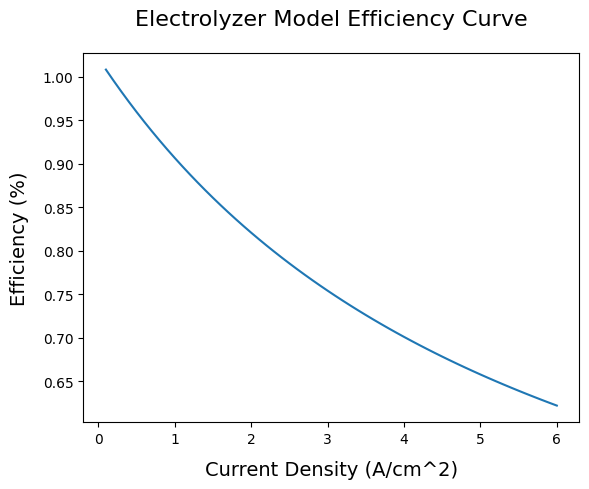

In [40]:
# Add labels and title
plt.xlabel('Current Density (A/cm^2)', fontsize=14, labelpad=10)
plt.ylabel('Efficiency (%)', fontsize=14, labelpad=10)
plt.title('Electrolyzer Model Efficiency Curve', fontsize=16, pad=20)

plt.plot(np.arange(0.1, 6.1, 0.1), 1.48/model_voltages)

In [23]:
capex_values = [capex * system_size + ((0.26 * capex * electrode_area * (operating_current-1.7) * (model_voltages[int(operating_current*10-1)])/1000) if (operating_current-1.7)>0 else 0) for operating_current in np.arange(0.1, 6.1, 0.1)]

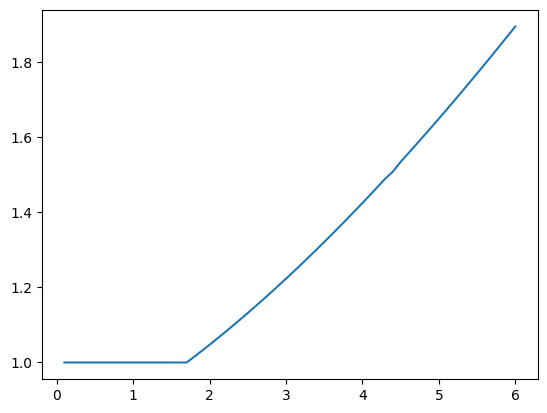

In [22]:
# Change CAPEX to log instead?
plt.plot(np.arange(0.1, 6.1, 0.1), [capex/9000000 for capex in capex_values])


In [24]:
class HourlyParameters:
    def __init__(self, power, hydrogen_produced, hourly_capex, opex, onm, lcoh, current):
        self.power = power
        self.hydrogen_produced = hydrogen_produced
        self.hourly_capex = hourly_capex
        self.opex = opex
        self.onm = onm
        self.lcoh = lcoh
        self.current = current
        
    def __getitem__(self, key):
        return getattr(self, key)

In [25]:
def calculate_lcoh(prices):
  optimized_list = []
  global model_voltages 


  for price in prices:
    now = HourlyParameters(0, 0, 0, 0, 0, 0, 0)
    prev = HourlyParameters(0, 0, 0, 0, 0, 0, 0)
    now_lcoh = 0
    prev_lcoh = 0


    for operating_current in np.arange(0.1, 6.1, 0.1):
      power = electrode_area * operating_current * (model_voltages[int(operating_current*10-1)])/1000 # Power required, in kW
      hydrogen_produced = (electrode_area * operating_current * molecular_weight_h2 * 3600) / (2 * faraday_constant * 1000) # Hydrogen produced, in kg

      hourly_capex = capex_values[int(operating_current*10-1)] / (years * hours_per_year)
      opex = price * power # Price
      onm = 0.05 * hourly_capex

      now_lcoh = (hourly_capex + opex + onm) / hydrogen_produced # Levelized cost of hydrogen, per kg

      # print(f"Operating Current: {operating_current:.1f} A, Power: {power:.2f} kW, Hydrogen produced: {hydrogen_produced:.4f} kg, Hourly capex: {hourly_capex:.4f} USD/kWh, Opex: {opex:.4f} USD/kWh, ONM: {onm:.4f} USD/kWh, LCOH: {now_lcoh:.4f} USD/kg")

      if now_lcoh > prev_lcoh and prev_lcoh != 0:
        # print("here", now_lcoh, "prev", prev_lcoh)
        now_lcoh = prev_lcoh
        now = prev
        # print("here")
        break

      prev_lcoh = now_lcoh
      now = HourlyParameters(power, hydrogen_produced, hourly_capex, opex, onm, now_lcoh, operating_current)
      prev = HourlyParameters(power, hydrogen_produced, hourly_capex, opex, onm, now_lcoh, operating_current)
    
    optimized_list.append(now)
    model_voltages += model_voltages * (model_voltages[int(now.current*10-1)] * cell_voltage_degradation_rate / 1000) # Increment all of the voltages by the voltage times the degradation rate per hour

    # print(f"Electricity Price: {price:.4f} $/kWh, Operating Current: {now.current:.1f} A, Power: {now.power:.2f} kW, Hydrogen produced: {now.hydrogen_produced:.4f} kg, Hourly capex: {now.hourly_capex:.4f} USD, Opex: {now.opex:.4f} USD, ONM: {now.onm:.4f} USD, LCOH: {now.lcoh:.4f} USD/kg")

  return optimized_list, model_voltages

In [26]:
def calculate_lcoh_no_deg(prices):
  optimized_list = []
  # global model_voltages 


  for price in prices:
    now = HourlyParameters(0, 0, 0, 0, 0, 0, 0)
    prev = HourlyParameters(0, 0, 0, 0, 0, 0, 0)
    now_lcoh = 0
    prev_lcoh = 0


    for operating_current in np.arange(0.1, 6.1, 0.1):
      power = electrode_area * operating_current * (model_voltages[int(operating_current*10-1)])/1000 # Power required, in kW
      hydrogen_produced = (electrode_area * operating_current * molecular_weight_h2 * 3600) / (2 * faraday_constant * 1000) # Hydrogen produced, in kg

      hourly_capex = capex_values[int(operating_current*10-1)] / (years * hours_per_year)
      opex = price * power # Price
      onm = 0.05 * hourly_capex

      now_lcoh = (hourly_capex + opex + onm) / hydrogen_produced # Levelized cost of hydrogen, per kg

      # print(f"Operating Current: {operating_current:.1f} A, Power: {power:.2f} kW, Hydrogen produced: {hydrogen_produced:.4f} kg, Hourly capex: {hourly_capex:.4f} USD/kWh, Opex: {opex:.4f} USD/kWh, ONM: {onm:.4f} USD/kWh, LCOH: {now_lcoh:.4f} USD/kg")

      if now_lcoh > prev_lcoh and prev_lcoh != 0:
        # print("here", now_lcoh, "prev", prev_lcoh)
        now_lcoh = prev_lcoh
        now = prev
        # print("here")
        break

      prev_lcoh = now_lcoh
      now = HourlyParameters(power, hydrogen_produced, hourly_capex, opex, onm, now_lcoh, operating_current)
      prev = HourlyParameters(power, hydrogen_produced, hourly_capex, opex, onm, now_lcoh, operating_current)
    
    optimized_list.append(now)
    # model_voltages += model_voltages * (model_voltages[int(now.current*10-1)] * cell_voltage_degradation_rate / 1000) # Increment all of the voltages by the voltage times the degradation rate per hour

    # print(f"Electricity Price: {price:.4f} $/kWh, Operating Current: {now.current:.1f} A, Power: {now.power:.2f} kW, Hydrogen produced: {now.hydrogen_produced:.4f} kg, Hourly capex: {now.hourly_capex:.4f} USD, Opex: {now.opex:.4f} USD, ONM: {now.onm:.4f} USD, LCOH: {now.lcoh:.4f} USD/kg")

  return optimized_list

In [27]:
def calculate_constant_lcoh(prices):
  boring_list = []
  operating_current = 1.7 # Our chosen set-point, in Amps
  global model_voltages 
  now = HourlyParameters(0, 0, 0, 0, 0, 0, 0)

  for price in prices:
    power = electrode_area * operating_current * (model_voltages[int(operating_current*10-1)])/1000 # Power required, in kW
    hydrogen_produced = (electrode_area * operating_current * molecular_weight_h2 * 3600) / (2 * faraday_constant * 1000) # Hydrogen produced, in kg

    hourly_capex = capex_values[int(operating_current*10-1)] / (years * hours_per_year)
    opex = price * power # Price
    onm = 0.05 * hourly_capex

    now_lcoh = (hourly_capex + opex + onm) / hydrogen_produced # Levelized cost of hydrogen, per kg

    # print(f"Operating Current: {operating_current:.1f} A, Power: {power:.2f} kW, Hydrogen produced: {hydrogen_produced:.4f} kg, Hourly capex: {hourly_capex:.4f} USD/kWh, Opex: {opex:.4f} USD/kWh, ONM: {onm:.4f} USD/kWh, LCOH: {now_lcoh:.4f} USD/kg")

    now = HourlyParameters(power, hydrogen_produced, hourly_capex, opex, onm, now_lcoh, operating_current)
    boring_list.append(now)
    model_voltages += model_voltages * (model_voltages[int(operating_current*10-1)] * cell_voltage_degradation_rate / 1000) # Increment all of the voltages by the voltage times the degradation rate per hour

  # print(f"Electricity Price: {price:.4f} $/kWh, Operating Current: {now.current:.1f} A, Power: {now.power:.2f} kW, Hydrogen produced: {now.hydrogen_produced:.4f} kg, Hourly capex: {now.hourly_capex:.4f} USD, Opex: {now.opex:.4f} USD, ONM: {now.onm:.4f} USD, LCOH: {now.lcoh:.4f} USD/kg")

  return boring_list, model_voltages

In [170]:
dj = pd.read_csv('da_hrl_lmps.csv')

# Group the rows by node ID
grouped = dj.groupby('pnode_id')

grouped.get_group(1)
lcoh_list = []
# Iterate over each group
for pnode_id, group_df in grouped:
    # Do something with the group
    # group_df contains all the rows associated with the current node_id
    #print(pnode_id)

    three_day = calculate_lcoh_no_deg(group_df['total_lmp_da']/1000)
    avg_power = sum([p.power for p in three_day]) / len(three_day)
    total_hydrogen_produced = sum([p.hydrogen_produced for p in three_day])
    total_hourly_capex = sum([p.hourly_capex for p in three_day])
    total_opex = sum([p.opex for p in three_day])
    total_onm = sum([p.onm for p in three_day])
    avg_lcoh = sum([p.lcoh for p in three_day]) / len(three_day)
    avg_current = sum([p.current for p in three_day]) / len(three_day)

    three_day_avg = HourlyParameters(avg_power, total_hydrogen_produced, total_hourly_capex, total_opex, total_onm, avg_lcoh, avg_current)

    lcoh_list.append(three_day_avg)
    
len(lcoh_list)

KeyboardInterrupt: ignored

In [147]:
print(lcoh_list[0].lcoh)

1219.120867980117


In [ ]:
lcoh2022 = calculate_lcoh(dt['total_lmp_da']/1000)

In [17]:
ty = data['Inflated to 2020 prices']
pk = []
for i in range(10):
    pk.extend(ty)
    
print(len(pk))

87600


In [18]:
lcoh20190, voltages01 = calculate_lcoh(pk)

In [90]:
lcoh2030cac, voltages2010c = calculate_constant_lcoh(dc['$/kWh'])
lcoh2030ca, voltages2010 = calculate_lcoh(dc['$/kWh'])

In [82]:
node_lcoh2010c, voltages2010c = calculate_constant_lcoh(de10['total_lmp_da']/1000)
node_lcoh2010, voltages2010 = calculate_lcoh(de10['total_lmp_da']/1000)

In [44]:
lcoh2030e, voltagese1 = calculate_lcoh(dr['$/kWh'])
lcoh2030e_const, voltagese3 = calculate_constant_lcoh(dr['$/kWh'])

In [43]:
# print(calculate_lcoh([0.01, 0.05]))
lcoh2019, voltages1 = calculate_lcoh(data['Inflated to 2020 prices'])

In [29]:
lcoh2019_constant, voltages_const = calculate_constant_lcoh(data['Inflated to 2020 prices'])
len(lcoh2019_constant)

8760

In [194]:
node_lcoh2013, voltages2013 = calculate_constant_lcoh(dj['total_lmp_da']/1000)
len(node_lcoh2013)

950616

In [31]:
def metrics(year_data):
  power_values = [p.power for p in year_data]
  hydrogen_produced_values = [p.hydrogen_produced for p in year_data]
  hourly_capex_values = [p.hourly_capex for p in year_data]
  opex_values = [p.opex for p in year_data]
  onm_values = [p.onm for p in year_data]
  lcoh_values = [p.lcoh for p in year_data]
  current_values = [p.current for p in year_data]

  avg_power = sum(power_values) / len(year_data)
  total_hydrogen_produced = sum(hydrogen_produced_values)
  total_hourly_capex = sum(hourly_capex_values)
  total_opex = sum(opex_values)
  total_onm = sum(onm_values)
  avg_lcoh = sum(lcoh_values) / len(year_data)
  avg_current = sum(current_values) / len(year_data)


  print(f"Power - Min: {min(power_values):.2f}, Max: {max(power_values):.2f}, Average: {sum(power_values)/len(power_values):.2f}, Quintile: {np.percentile(power_values, 20):.2f}, {np.percentile(power_values, 60):.2f}")
  print(f"Hydrogen Produced - Min: {min(hydrogen_produced_values):.4f}, Max: {max(hydrogen_produced_values):.4f}, Average: {sum(hydrogen_produced_values)/len(hydrogen_produced_values):.4f}, Quintile: {np.percentile(hydrogen_produced_values, 20):.4f}, {np.percentile(hydrogen_produced_values, 60):.4f}")
  print(f"Hourly Capex - Min: {min(hourly_capex_values):.4f}, Max: {max(hourly_capex_values):.4f}, Average: {sum(hourly_capex_values)/len(hourly_capex_values):.4f}, Quintile: {np.percentile(hourly_capex_values, 20):.4f}, {np.percentile(hourly_capex_values, 60):.4f}")
  print(f"Opex - Min: {min(opex_values):.4f}, Max: {max(opex_values):.4f}, Average: {sum(opex_values)/len(opex_values):.4f}, Quintile: {np.percentile(opex_values, 20):.4f}, {np.percentile(opex_values, 60):.4f}")
  print(f"ONM - Min: {min(onm_values):.4f}, Max: {max(onm_values):.4f}, Average: {sum(onm_values)/len(onm_values):.4f}, Quintile: {np.percentile(onm_values, 20):.4f}, {np.percentile(onm_values, 60):.4f}")
  print(f"LCOH - Min: {min(lcoh_values):.4f}, Max: {max(lcoh_values):.4f}, Average: {sum(lcoh_values)/len(lcoh_values):.4f}, Quintile: {np.percentile(lcoh_values, 20):.4f}, {np.percentile(lcoh_values, 60):.4f}")
  print(f"Current - Min: {min(current_values):.1f}, Max: {max(current_values):.1f}, Average: {sum(current_values)/len(current_values):.1f}, Quintile: {np.percentile(current_values, 20):.1f}, {np.percentile(current_values, 60):.1f}")
  print("----------------")
  print(f"Average power: {avg_power:.2f} kW, Total hydrogen produced: {total_hydrogen_produced:.2f} kg, Total hourly capex: {total_hourly_capex:.2f} USD, Total opex: {total_opex:.2f} USD, Total ONM: {total_onm:.2f} USD, Average LCOH: {avg_lcoh:.2f} USD/kg, Median LCOH: {np.median(lcoh_values):.2f} USD/kg, Average current: {avg_current:.2f} A")
  



In [99]:
const = calculate_constant_lcoh(np.arange(0.005, 0.05, 0.005))[0]
dynamic = calculate_lcoh(np.arange(0.005, 0.05, 0.005))[0]

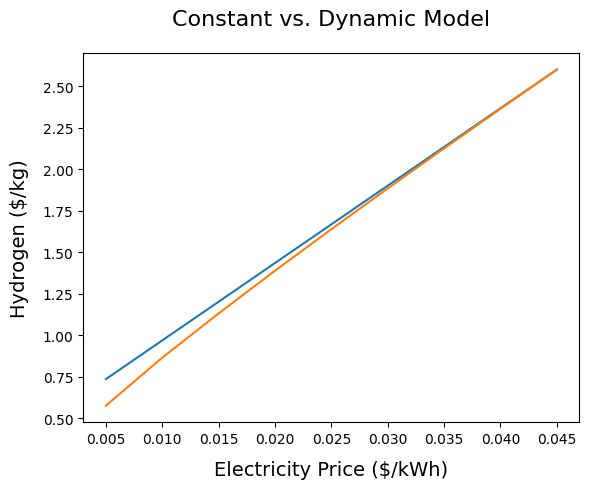

In [101]:
# Add labels and title
plt.xlabel('Electricity Price ($/kWh)', fontsize=14, labelpad=10)
plt.ylabel('Hydrogen ($/kg)', fontsize=14, labelpad=10)
plt.title('Constant vs. Dynamic Model', fontsize=16, pad=20)

plt.plot(np.arange(0.005, 0.05, 0.005), [c.lcoh for c in const])
plt.plot(np.arange(0.005, 0.05, 0.005), [d.lcoh for d in dynamic])

In [102]:
metrics(lcoh2030cac)
print(np.average(dc['$/kWh']))

Power - Min: 10026.75, Max: 10026.98, Average: 10026.86, Quintile: 10026.80, 10026.89
Hydrogen Produced - Min: 214.9142, Max: 214.9142, Average: 214.9142, Quintile: 214.9142, 214.9142
Hourly Capex - Min: 102.6694, Max: 102.6694, Average: 102.6694, Quintile: 102.6694, 102.6694
Opex - Min: 2.8075, Max: 827.7203, Average: 434.0782, Quintile: 310.6301, 520.6906
ONM - Min: 5.1335, Max: 5.1335, Average: 5.1335, Quintile: 5.1335, 5.1335
LCOH - Min: 0.5147, Max: 4.3530, Average: 2.5214, Quintile: 1.9470, 2.9244
Current - Min: 1.7, Max: 1.7, Average: 1.7, Quintile: 1.7, 1.7
----------------
Average power: 10026.86 kW, Total hydrogen produced: 1882863.62 kg, Total hourly capex: 899486.65 USD, Total opex: 3802959.25 USD, Total ONM: 44974.33 USD, Average LCOH: 2.52 USD/kg, Median LCOH: 2.86 USD/kg, Average current: 1.70 A
0.04329150228307271


In [103]:
metrics(lcoh2030ca)

Power - Min: 8676.45, Max: 31876.29, Average: 13415.79, Quintile: 10027.06, 10027.21
Hydrogen Produced - Min: 189.6302, Max: 556.2486, Average: 269.1114, Quintile: 214.9142, 214.9142
Hourly Capex - Min: 102.6694, Max: 152.8975, Average: 110.4934, Quintile: 102.6694, 102.6694
Opex - Min: 8.9252, Max: 731.3564, Average: 455.2771, Quintile: 398.2647, 520.7027
ONM - Min: 5.1335, Max: 7.6449, Average: 5.5247, Quintile: 5.1335, 5.1335
LCOH - Min: 0.3047, Max: 4.3455, Average: 2.4931, Quintile: 1.9320, 2.9244
Current - Min: 1.5, Max: 4.4, Average: 2.1, Quintile: 1.7, 1.7
----------------
Average power: 13415.79 kW, Total hydrogen produced: 2357685.01 kg, Total hourly capex: 968032.98 USD, Total opex: 3988682.75 USD, Total ONM: 48401.65 USD, Average LCOH: 2.49 USD/kg, Median LCOH: 2.86 USD/kg, Average current: 2.13 A


In [86]:
metrics(node_lcoh2010c)
print(np.average(de10['total_lmp_da']))

Power - Min: 10017.89, Max: 10022.28, Average: 10020.09, Quintile: 10018.77, 10020.53
Hydrogen Produced - Min: 214.9142, Max: 214.9142, Average: 214.9142, Quintile: 214.9142, 214.9142
Hourly Capex - Min: 102.6694, Max: 102.6694, Average: 102.6694, Quintile: 102.6694, 102.6694
Opex - Min: -39.9812, Max: 3081.4019, Average: 466.6960, Quintile: 313.7548, 448.1088
ONM - Min: 5.1335, Max: 5.1335, Average: 5.1335, Quintile: 5.1335, 5.1335
LCOH - Min: 0.3156, Max: 14.8394, Average: 2.6732, Quintile: 1.9615, 2.5867
Current - Min: 1.7, Max: 1.7, Average: 1.7, Quintile: 1.7, 1.7
----------------
Average power: 10020.09 kW, Total hydrogen produced: 35770325.34 kg, Total hourly capex: 17088295.69 USD, Total opex: 77676881.99 USD, Total ONM: 854414.78 USD, Average LCOH: 2.67 USD/kg, Median LCOH: 2.42 USD/kg, Average current: 1.70 A
46.57613728021509


In [85]:
metrics(node_lcoh2010)


Power - Min: 4296.89, Max: 48008.16, Average: 11380.17, Quintile: 10023.77, 11418.95
Hydrogen Produced - Min: 101.1361, Max: 758.5208, Average: 238.7132, Quintile: 214.9142, 240.1983
Hourly Capex - Min: 102.6694, Max: 194.4205, Average: 106.2572, Quintile: 102.6694, 105.8751
Opex - Min: -191.5159, Max: 1321.3823, Average: 492.1321, Quintile: 407.1756, 470.5244
ONM - Min: 5.1335, Max: 9.7210, Average: 5.3129, Quintile: 5.1335, 5.2938
LCOH - Min: 0.0166, Max: 14.1313, Average: 2.6631, Quintile: 1.9477, 2.5870
Current - Min: 0.8, Max: 6.0, Average: 1.9, Quintile: 1.7, 1.9
----------------
Average power: 11380.17 kW, Total hydrogen produced: 39731422.25 kg, Total hourly capex: 17685451.38 USD, Total opex: 81910469.27 USD, Total ONM: 884272.57 USD, Average LCOH: 2.66 USD/kg, Median LCOH: 2.42 USD/kg, Average current: 1.89 A


In [45]:
metrics(lcoh2030e_const)
print(np.average(dr['$/kWh']))

Power - Min: 10017.66, Max: 10017.89, Average: 10017.78, Quintile: 10017.71, 10017.80
Hydrogen Produced - Min: 214.9142, Max: 214.9142, Average: 214.9142, Quintile: 214.9142, 214.9142
Hourly Capex - Min: 102.6694, Max: 102.6694, Average: 102.6694, Quintile: 102.6694, 102.6694
Opex - Min: 0.8014, Max: 5858.3629, Average: 254.3189, Quintile: 197.6516, 260.3626
ONM - Min: 5.1335, Max: 5.1335, Average: 5.1335, Quintile: 5.1335, 5.1335
LCOH - Min: 0.5053, Max: 27.7607, Average: 1.6850, Quintile: 1.4213, 1.7131
Current - Min: 1.7, Max: 1.7, Average: 1.7, Quintile: 1.7, 1.7
----------------
Average power: 10017.78 kW, Total hydrogen produced: 1882648.70 kg, Total hourly capex: 899383.98 USD, Total opex: 2227833.25 USD, Total ONM: 44969.20 USD, Average LCOH: 1.68 USD/kg, Median LCOH: 1.68 USD/kg, Average current: 1.70 A
0.025386744292237442


In [46]:
metrics(lcoh2030e)

Power - Min: 3147.67, Max: 31845.91, Average: 15964.79, Quintile: 13575.43, 15069.82
Hydrogen Produced - Min: 75.8521, Max: 556.2486, Average: 316.0071, Quintile: 278.1243, 303.4083
Hourly Capex - Min: 102.6694, Max: 152.8975, Average: 116.5639, Quintile: 110.9046, 114.4014
Opex - Min: 2.5476, Max: 1840.7284, Average: 355.3834, Quintile: 335.8812, 376.8515
ONM - Min: 5.1335, Max: 7.6449, Average: 5.8282, Quintile: 5.5452, 5.7201
LCOH - Min: 0.2932, Max: 25.6886, Average: 1.6409, Quintile: 1.3736, 1.6865
Current - Min: 0.6, Max: 4.4, Average: 2.5, Quintile: 2.2, 2.4
----------------
Average power: 15964.79 kW, Total hydrogen produced: 2768221.77 kg, Total hourly capex: 1021099.40 USD, Total opex: 3113158.30 USD, Total ONM: 51054.97 USD, Average LCOH: 1.64 USD/kg, Median LCOH: 1.65 USD/kg, Average current: 2.50 A


In [32]:
metrics(lcoh2019_constant)
print(np.average(data['Inflated to 2020 prices']))

Power - Min: 10016.94, Max: 10017.17, Average: 10017.05, Quintile: 10016.98, 10017.08
Hydrogen Produced - Min: 214.9142, Max: 214.9142, Average: 214.9142, Quintile: 214.9142, 214.9142
Hourly Capex - Min: 102.6694, Max: 102.6694, Average: 102.6694, Quintile: 102.6694, 102.6694
Opex - Min: 33.0588, Max: 50787.7345, Average: 382.6004, Quintile: 161.6415, 227.6570
ONM - Min: 5.1335, Max: 5.1335, Average: 5.1335, Quintile: 5.1335, 5.1335
LCOH - Min: 0.6554, Max: 236.8179, Average: 2.2819, Quintile: 1.2537, 1.5609
Current - Min: 1.7, Max: 1.7, Average: 1.7, Quintile: 1.7, 1.7
----------------
Average power: 10017.05 kW, Total hydrogen produced: 1882648.70 kg, Total hourly capex: 899383.98 USD, Total opex: 3351579.43 USD, Total ONM: 44969.20 USD, Average LCOH: 2.28 USD/kg, Median LCOH: 1.47 USD/kg, Average current: 1.70 A
0.03819486580776256


In [33]:
metrics(lcoh2019)

Power - Min: 999.60, Max: 31843.59, Average: 16270.18, Quintile: 13574.17, 17383.93
Hydrogen Produced - Min: 25.2840, Max: 556.2486, Average: 320.9325, Quintile: 278.1243, 341.3344
Hourly Capex - Min: 102.6694, Max: 152.8975, Average: 117.6301, Quintile: 110.9046, 119.8562
Opex - Min: 105.0906, Max: 5068.1004, Average: 384.7314, Quintile: 309.0541, 355.8868
ONM - Min: 5.1335, Max: 7.6449, Average: 5.8815, Quintile: 5.5452, 5.9928
LCOH - Min: 0.4775, Max: 204.7104, Average: 2.1720, Quintile: 1.1893, 1.5244
Current - Min: 0.2, Max: 4.4, Average: 2.5, Quintile: 2.2, 2.7
----------------
Average power: 16270.18 kW, Total hydrogen produced: 2811368.97 kg, Total hourly capex: 1030439.90 USD, Total opex: 3370247.39 USD, Total ONM: 51521.99 USD, Average LCOH: 2.17 USD/kg, Median LCOH: 1.43 USD/kg, Average current: 2.54 A


In [48]:
metrics(lcoh2022)

Power - Min: 2049.06, Max: 47960.04, Average: 16342.44, Quintile: 13574.14, 17383.79
Hydrogen Produced - Min: 50.5681, Max: 758.5208, Average: 323.1339, Quintile: 278.1243, 341.3344
Hourly Capex - Min: 101.5477, Max: 136.3226, Average: 106.0911, Quintile: 104.3014, 106.6066
Opex - Min: -9926.2898, Max: 2362.5817, Average: 467.1925, Quintile: 411.5300, 467.6875
ONM - Min: 5.0774, Max: 6.8161, Average: 5.3046, Quintile: 5.2151, 5.3303
LCOH - Min: -12.8977, Max: 48.8356, Average: 1.8765, Quintile: 1.4047, 1.8320
Current - Min: 0.4, Max: 6.0, Average: 2.6, Quintile: 2.2, 2.7
----------------
Average power: 16342.44 kW, Total hydrogen produced: 307176233.95 kg, Total hourly capex: 100851869.15 USD, Total opex: 444120638.75 USD, Total ONM: 5042593.46 USD, Average LCOH: 1.88 USD/kg, Average current: 2.56 A


In [196]:
metrics(lcoh_list)

Power - Min: 11875.97, Max: 17083.91, Average: 14214.56, Quintile: 13526.10, 14553.38
Hydrogen Produced - Min: 17711.4614, Max: 24032.4683, Average: 20732.5071, Quintile: 19885.8878, 21162.7312
Hourly Capex - Min: 7805.1905, Max: 8578.5382, Average: 8097.0636, Quintile: 7981.8990, 8150.9404
Opex - Min: 25175.4686, Max: 39142.0717, Average: 28449.6980, Quintile: 27157.4155, 28919.5488
ONM - Min: 390.2595, Max: 428.9269, Average: 404.8532, Quintile: 399.0949, 407.5470
LCOH - Min: 1.5353, Max: 4.0256, Average: 1.8640, Quintile: 1.7125, 1.9225
Current - Min: 1.9, Max: 2.6, Average: 2.3, Quintile: 2.2, 2.3
----------------
Average power: 14214.56 kW, Total hydrogen produced: 15238392.72 kg, Total hourly capex: 5951341.73 USD, Total opex: 20910528.04 USD, Total ONM: 297567.09 USD, Average LCOH: 1.86 USD/kg, Median LCOH: 1.83 USD/kg, Average current: 2.28 A


In [195]:
metrics(node_lcoh2013)

Power - Min: 10065.77, Max: 10091.11, Average: 10078.43, Quintile: 10070.83, 10080.96
Hydrogen Produced - Min: 214.9142, Max: 214.9142, Average: 214.9142, Quintile: 214.9142, 214.9142
Hourly Capex - Min: 102.6694, Max: 102.6694, Average: 102.6694, Quintile: 102.6694, 102.6694
Opex - Min: -2083.7989, Max: 11608.3753, Average: 308.9389, Quintile: 213.6121, 297.8760
ONM - Min: 5.1335, Max: 5.1335, Average: 5.1335, Quintile: 5.1335, 5.1335
LCOH - Min: -9.1943, Max: 54.5156, Average: 1.9391, Quintile: 1.4956, 1.8876
Current - Min: 1.7, Max: 1.7, Average: 1.7, Quintile: 1.7, 1.7
----------------
Average power: 10078.43 kW, Total hydrogen produced: 204300910.78 kg, Total hourly capex: 97599178.65 USD, Total opex: 293682249.49 USD, Total ONM: 4879958.93 USD, Average LCOH: 1.94 USD/kg, Median LCOH: 1.80 USD/kg, Average current: 1.70 A


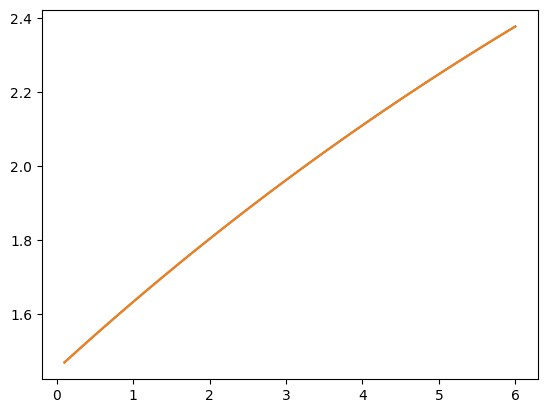

In [120]:

plt.plot(np.arange(0.1, 6.1, 0.1), voltages1)
plt.plot(np.arange(0.1, 6.1, 0.1), model_voltages)

In [1]:
u = [1, 2, 3]
z = u * 3
print(u)
print(z)

[1, 2, 3]
[1, 2, 3, 1, 2, 3, 1, 2, 3]
